In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

zot_df = pd.read_csv('./data/zot_clean.csv')

# Convert the date columns to datetime objects
date_columns = ["Date", "Date Added", "Date Modified"]
for col in date_columns:
    zot_df[col] = pd.to_datetime(zot_df[col], errors='coerce',format="mixed")

zot_df["Publication Year"] = zot_df["Publication Year"].astype("Int64")
zot_df["Hearts"] = zot_df["Hearts"].astype("Int64")

zot_df["Manual Tags"] = zot_df["Manual Tags"].fillna("").str.split(";").apply(lambda tags: [tag.strip() for tag in tags])
zot_df["Common Tags"] = zot_df["Common Tags"].fillna("").str.split(";").apply(lambda tags: [tag.strip() for tag in tags])
zot_df["Common Tags"] = zot_df["Common Tags"].apply(lambda tags : [tag for tag in tags if tag != ""])

#loading computed embeddings
embeddings_df = pd.read_csv('./data/zot_embeddings.csv') 

d:\program_files\miniconda\envs\zoteromap\Lib\site-packages\pacmap\pacmap.py:822: UserWarning: Warning: random state is set to 3
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


Number of clusters:  20


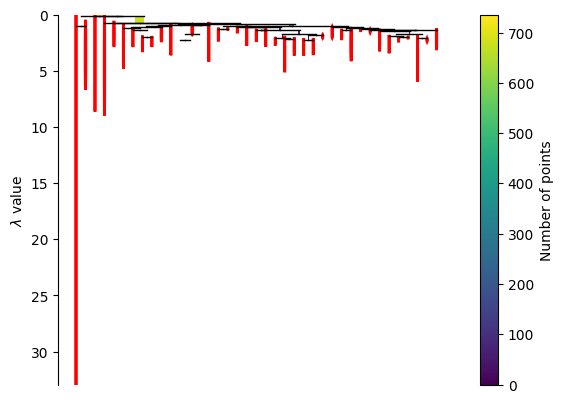

In [5]:
import pacmap
import hdbscan

pac7 = pacmap.PaCMAP(
    n_components=2,
    n_neighbors=7,
    MN_ratio=0.5,
    FP_ratio=2.0,
    distance="angular",
    random_state=3)

pacd = pacmap.PaCMAP(
    n_components=5,
    n_neighbors=7,
    MN_ratio=0.5,
    FP_ratio=2.0,
    distance="angular",
    random_state=3)

hdb = hdbscan.HDBSCAN(min_cluster_size=5,cluster_selection_epsilon=0.8)

# 10 sec for 720
zot_pac7 = pac7.fit_transform(np.array(embeddings_df))
zot_pacd = pacd.fit_transform(np.array(embeddings_df))
clusters = hdb.fit_predict(np.array(zot_pacd))

pd.DataFrame(zot_pac7).to_csv('./data/zot_pac7.csv')
pd.DataFrame(clusters).to_csv('./data/clusters.csv')

hdb.condensed_tree_.plot(select_clusters=True)
print("Number of clusters: ", len(set(clusters)))

In [3]:
import sklearn.feature_extraction

cv = sklearn.feature_extraction.text.CountVectorizer(lowercase=True, min_df=10)
sparse_metadata = cv.fit_transform(zot_df["Manual Tags"].apply(lambda x: " ".join(x)).values+ " " + zot_df["Abstract Note"].fillna(""))

In [10]:
print(sparse_metadata.shape)

(719, 1235)


In [11]:
print(sparse_metadata)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 48708 stored elements and shape (719, 1235)>
  Coords	Values
  (0, 620)	9
  (0, 645)	4
  (0, 1093)	8
  (0, 601)	1
  (0, 530)	1
  (0, 123)	1
  (0, 590)	4
  (0, 1092)	1
  (0, 38)	1
  (0, 156)	2
  (0, 18)	1
  (0, 15)	1
  (0, 1210)	1
  (0, 1125)	2
  (0, 532)	1
  (0, 593)	1
  (0, 1113)	5
  (0, 179)	1
  (0, 261)	2
  (0, 466)	1
  (0, 1201)	2
  (0, 53)	4
  (0, 663)	2
  (0, 550)	5
  (0, 455)	1
  :	:
  (718, 1008)	2
  (718, 443)	1
  (718, 689)	1
  (718, 433)	1
  (718, 75)	4
  (718, 886)	1
  (718, 1184)	2
  (718, 814)	1
  (718, 690)	1
  (718, 439)	1
  (718, 958)	1
  (718, 312)	1
  (718, 240)	1
  (718, 388)	3
  (718, 516)	1
  (718, 1194)	4
  (718, 1051)	1
  (718, 265)	1
  (718, 98)	2
  (718, 779)	1
  (718, 612)	1
  (718, 1205)	1
  (718, 452)	1
  (718, 635)	1
  (718, 639)	2
